Title: When to Use Heatmaps
Slug: when-use-heatmaps
Summary: Examples of datasets to illustrate when to use heatmaps - plots of rectangular data as a color-encoded matrix
Date: 2018-06-14 17:00  
Category: Data Visualizations
Subcategory: Best Practices
PostType: Tutorial
Tags: heatmaps
Keywords: when use heatmaps
Authors: Dan Friedman

Heatmaps are great for visualizing table-like data with variations in coloring. 

If you're unfamiliar with heatmaps, please scroll down to see an example.

Heatmaps help reveal patterns of similar values next to one another based on their color.

I'll illustrate a few examples of heatmaps below.

#### Import Modules

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
% matplotlib inline

### Example: Heatmap of Bike Rides by Day of Week and Hour of Day

In the San Francisco Bay Area, a company Motivate operates a network of bikes across several cities. You can walk up to a bike, pay and unlock it from a dock, ride it to your destination, and park it in another nearby dock.

For each ride, Motivate records data on the start time, end time and more.

I'm curious to see riding patterns by day of week and hour of day. Are they different or similar?

#### Acquire Data and Organize for Heatmap Visualization

Read in CSV.

In [323]:
df = pd.read_csv('201805-fordgobike-tripdata.csv')

Convert `start_time` field into a datetime type with new field name called `start_time_datetime`

In [324]:
df['start_time_datetime'] = pd.to_datetime(df['start_time'])

Keep records of rides only before May 29th so we have the same number of occurrences for all days of the week.

In [325]:
df = df[df['start_time_datetime']<date(2018, 5, 29)]

Make new column `start_time_day_name` to be the day name of start of the ride such as Saturday.

In [326]:
df['start_time_day_name'] = df['start_time_datetime'].dt.weekday_name

Make new column `start_time_hour` for the start time hour of rides.

In [327]:
df['start_time_hour'] = df['start_time_datetime'].dt.hour

Make new dataframe `df_rides_day_hour2` to pivot our data and by day and hour, get the count of rides.

In [328]:
df_rides_day_hour2 = pd.pivot_table(df[['start_time_day_name', 'start_time_hour', 'duration_sec']], index=['start_time_day_name', 'start_time_hour'], aggfunc='count')

Unstack below puts days on the x-axis and hour of day on the y-axis.

In [329]:
df_rides_day_hour3 = df_rides_day_hour2.unstack(level=0)

Re-index axis so day of week appears in logical progression.

In [330]:
df_rides_day_hour3 = df_rides_day_hour3.reindex_axis(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

Create new axis tick labels for easy to read hours and days of the week.

In [331]:
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "am"
    morning_hours.append(detailed_hour)

In [332]:
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "pm"
    afternoon_hours.append(detailed_hour)

In [333]:
detailed_hours = ["12am"] + morning_hours + ["12pm"] + afternoon_hours

In [334]:
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

#### Plot Heatmap of Ride Counts by Day and Hour of Day

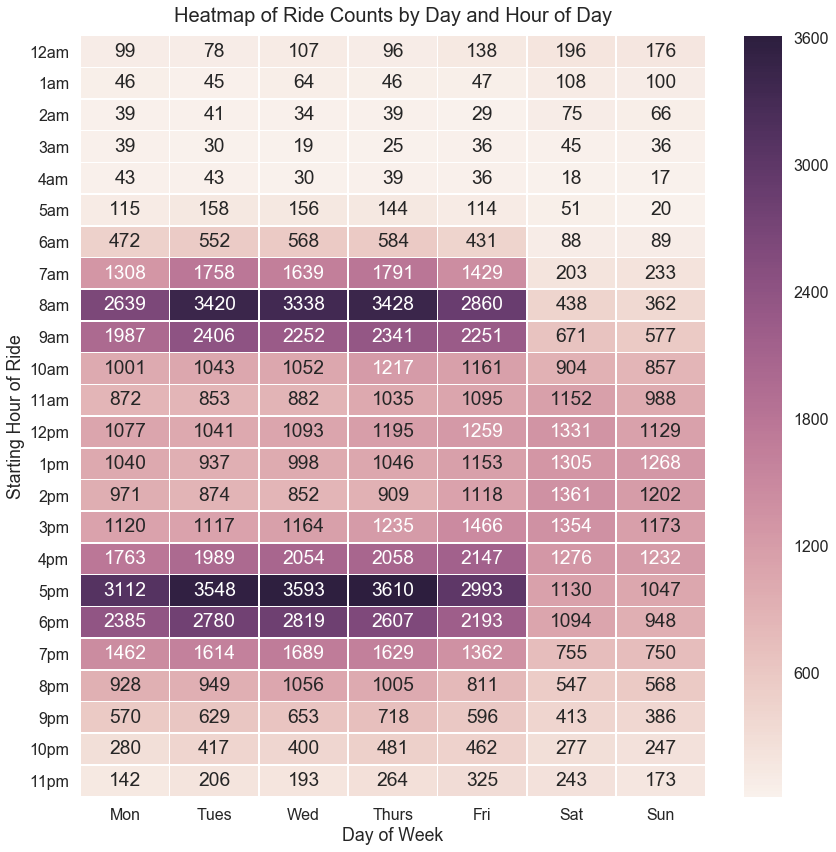

In [335]:
sns.set_context("poster")
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df_rides_day_hour3, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Ride Counts by Day and Hour of Day", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Starting Hour of Ride');

#### Interpretation of Heat Map of Rides

On weekdays, Monday to Friday, most rides are taken during typical commuting hours, from 7am to 9am and 4pm - 7pm.

On weekends, there's fairly consistent amount of rides per hour from 11am - 6pm.

### Example: Heatmap of Flights By Month and Year

The Seaborn visualization library provides an example dataset of the count of flights per month over the years 1949 to 1960. I want to easily visualize this data and see if there are any patterns.

#### Acquire the Flights Dataset

In [336]:
flights_long = sns.load_dataset("flights")

#### Pivot the Data to Heatmap Format

In [338]:
flights = flights_long.pivot("month", "year", "passengers")

#### Draw a Heatmap of Flight Counts by Month and Year

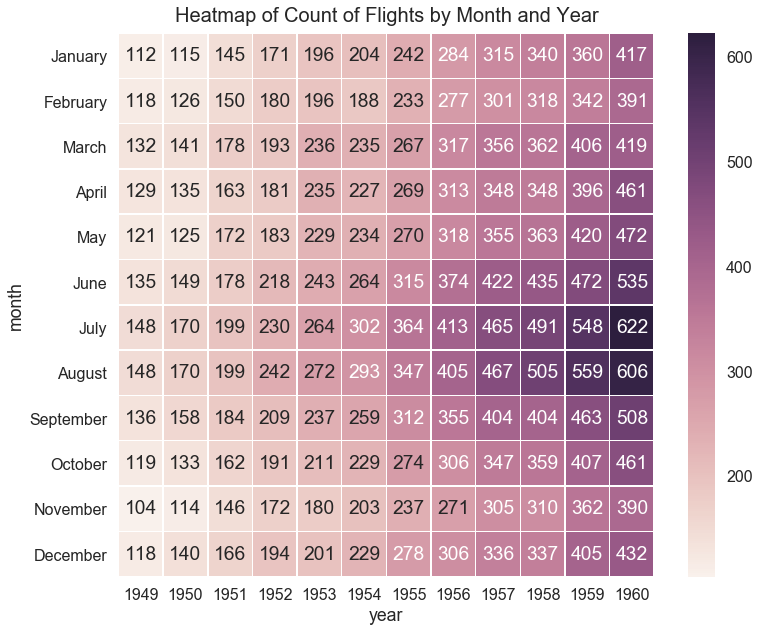

In [344]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)
ax.axes.set_title("Heatmap of Count of Flights by Month and Year", fontsize=20, y=1.01);

#### Interpret Heatmap of Flights Over Time

Over the years, there's a trend towards more flights by month. 

The most frequent flight months of any year are typically July and August.